
<h2 style="text-align:center;">K-Means Clustering</h2>

### 📌 Introduction
K-Means is one of the most popular **unsupervised machine learning algorithms** used for clustering. 
It groups data points into **k clusters** based on feature similarity, making it useful in customer segmentation, market analysis, image compression, and more.
    


### 🧠 Theory of K-Means

1. **What is K-Means?**
   - An iterative algorithm that partitions data into *k* clusters based on similarity.

2. **Steps of the Algorithm:**
   1. Choose the number of clusters (*k*).
   2. Randomly initialize *k* centroids.
   3. Assign each data point to the nearest centroid using **Euclidean distance**.
   4. Recompute centroids as the mean of assigned points.
   5. Repeat until centroids stabilize (no significant change).

3. **Objective Function:**
   K-Means minimizes the **Within-Cluster Sum of Squares (WCSS):**  

   \[
   J = \sum_{i=1}^{k}\sum_{x \in C_i} ||x - \mu_i||^2
   \]

   where:
   - \(C_i\) = cluster
   - \(\mu_i\) = centroid of cluster i

4. **Choosing the Optimal k:**
   - **Elbow Method** → Plot WCSS vs k and find the "elbow" point.
   - Other methods include **Silhouette Score**.

5. **Key Notes:**
   - Works well with spherical clusters.
   - Sensitive to outliers and initialization.
   - Requires predefined *k*.
    


### 📊 Dataset
We will use the **Mall Customers dataset**, which contains customer information such as:
- Age
- Annual Income
- Spending Score  

Our goal is to cluster customers based on **Annual Income** and **Spending Score**.
    

In [6]:

# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("../data/Mall_Customers.csv")

# Selecting relevant features (Annual Income, Spending Score)
X = df.iloc[:, [3, 4]].values  # ➤ X will contain the two columns for clustering

# Display first 5 rows
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),k-mea
0,1,Male,19,15,39,NaN
1,2,Male,21,15,81,NaN
2,3,Female,20,16,6,NaN
3,4,Female,23,16,77,NaN
4,5,Female,31,17,40,NaN



### 📐 Finding the Optimal Number of Clusters (Elbow Method)
We calculate **WCSS (Within-Cluster Sum of Squares)** for different values of k and 
look for the "elbow" point in the graph.
    

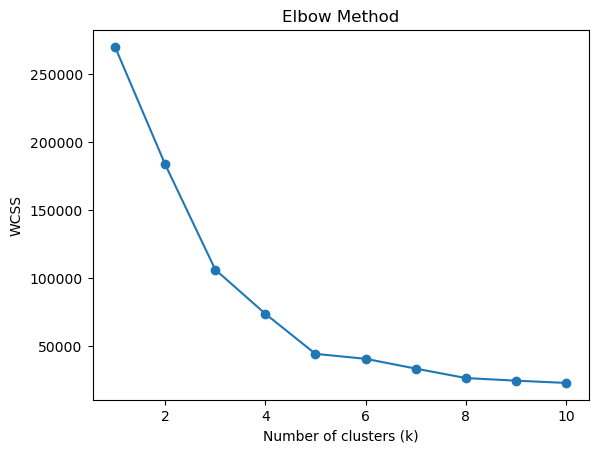

In [7]:

from sklearn.cluster import KMeans

wcss = []

# Test values of k from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # ➤ inertia_ gives WCSS

# Plot elbow curve
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()



### 🤖 Training K-Means Model
From the Elbow Method, we select an appropriate **k** (let's assume k=5).
    

In [8]:

# Training the KMeans model with k=5
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)  # ➤ y_kmeans contains cluster labels for each data point

# Add cluster labels to dataframe
df["Cluster"] = y_kmeans

# Display sample with cluster assignments
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),k-mea,Cluster
0,1,Male,19,15,39,NaN,4
1,2,Male,21,15,81,NaN,2
2,3,Female,20,16,6,NaN,4
3,4,Female,23,16,77,NaN,2
4,5,Female,31,17,40,NaN,4



### 📈 Visualizing the Clusters
We plot customers based on **Annual Income vs Spending Score**, 
with each cluster represented by a different color.
    

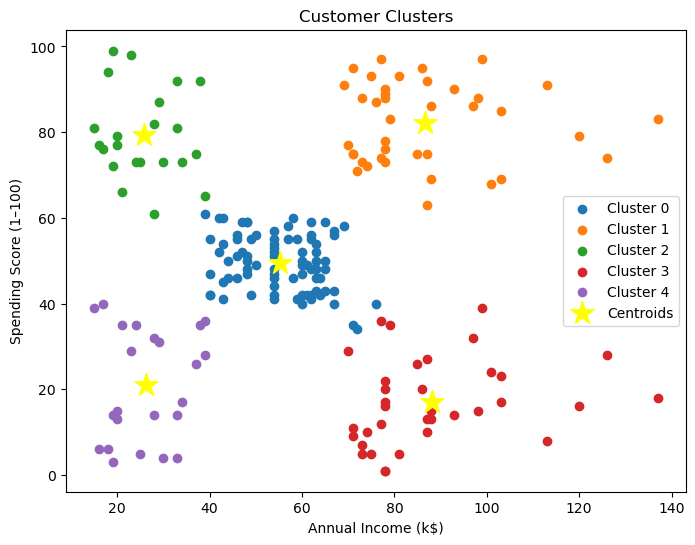

In [9]:

# Visualizing clusters
plt.figure(figsize=(8,6))

# Plot each cluster
for cluster in range(5):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], label=f"Cluster {cluster}")

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c="yellow", marker="*", label="Centroids")

plt.title("Customer Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.show()



### 💾 Saving Results
We can save the clustered dataset for future use.
    

In [10]:

# Save clustered dataset
df.to_csv("KMeans_Clustering.csv", index=False)
print("Clustered dataset saved as 'KMeans_Clustering.csv'")  # ➤ Confirmation


Clustered dataset saved as 'KMeans_Clustering.csv'



<h2 style="text-align:center;">📌 Summary</h2>

- Imported dataset and selected relevant features (Annual Income, Spending Score).  
- Applied **Elbow Method** to determine optimal clusters.  
- Trained **K-Means model with k=5**.  
- Visualized the clusters with centroids.  
- Saved final clustered dataset.  

👉 K-Means helps businesses in **customer segmentation** to design targeted marketing strategies.
    